In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

%matplotlib inline

## Q1. 전국 시도별 약국수를 구해주세요!

* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [4]:
df[df["상권업종소분류명"] == "약국"]["시도명"].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

In [5]:
df_animal_hospital = df[df["상권업종소분류명"] == "동물병원"].copy()
df_animal_hospital["시도명"].value_counts()

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

<Axes: ylabel='시도명'>

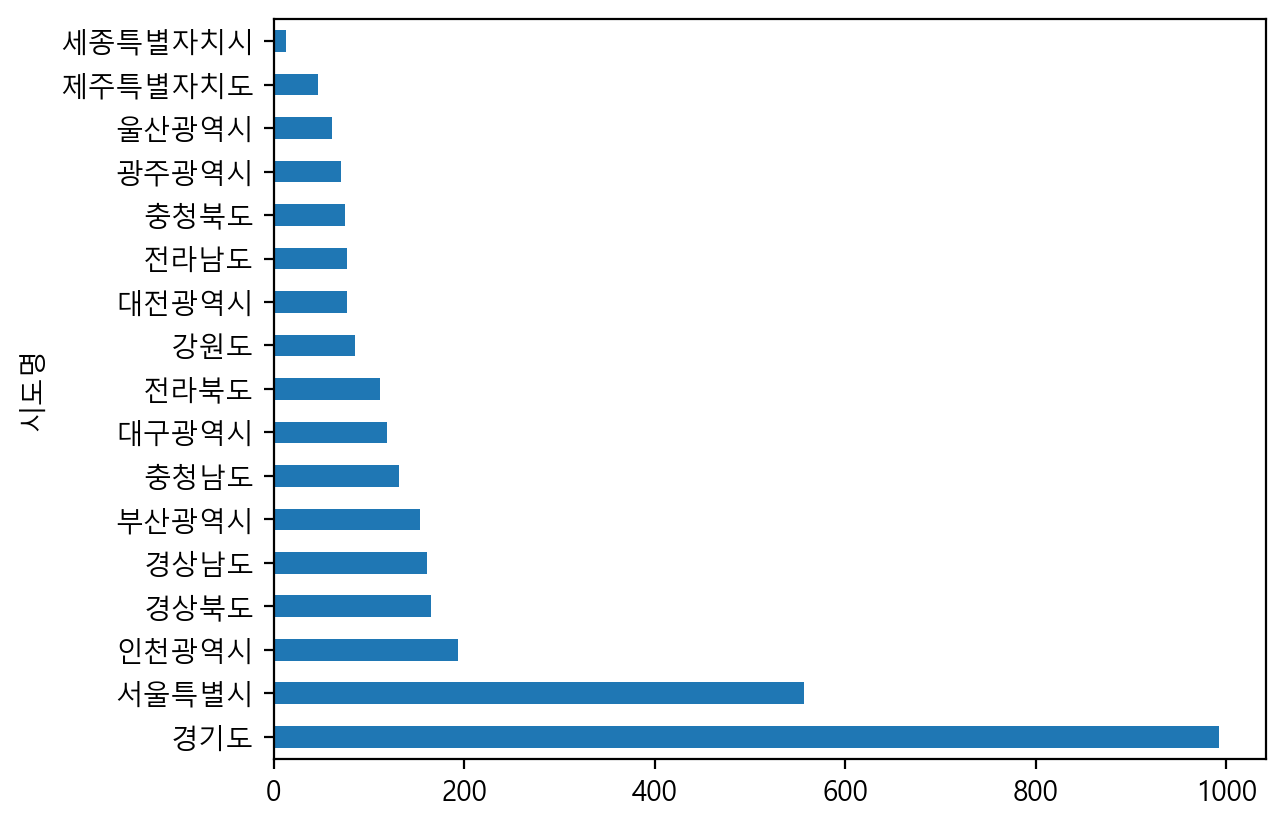

In [6]:
df_animal_hospital["시도명"].value_counts().plot.barh()

<Axes: xlabel='경도', ylabel='위도'>

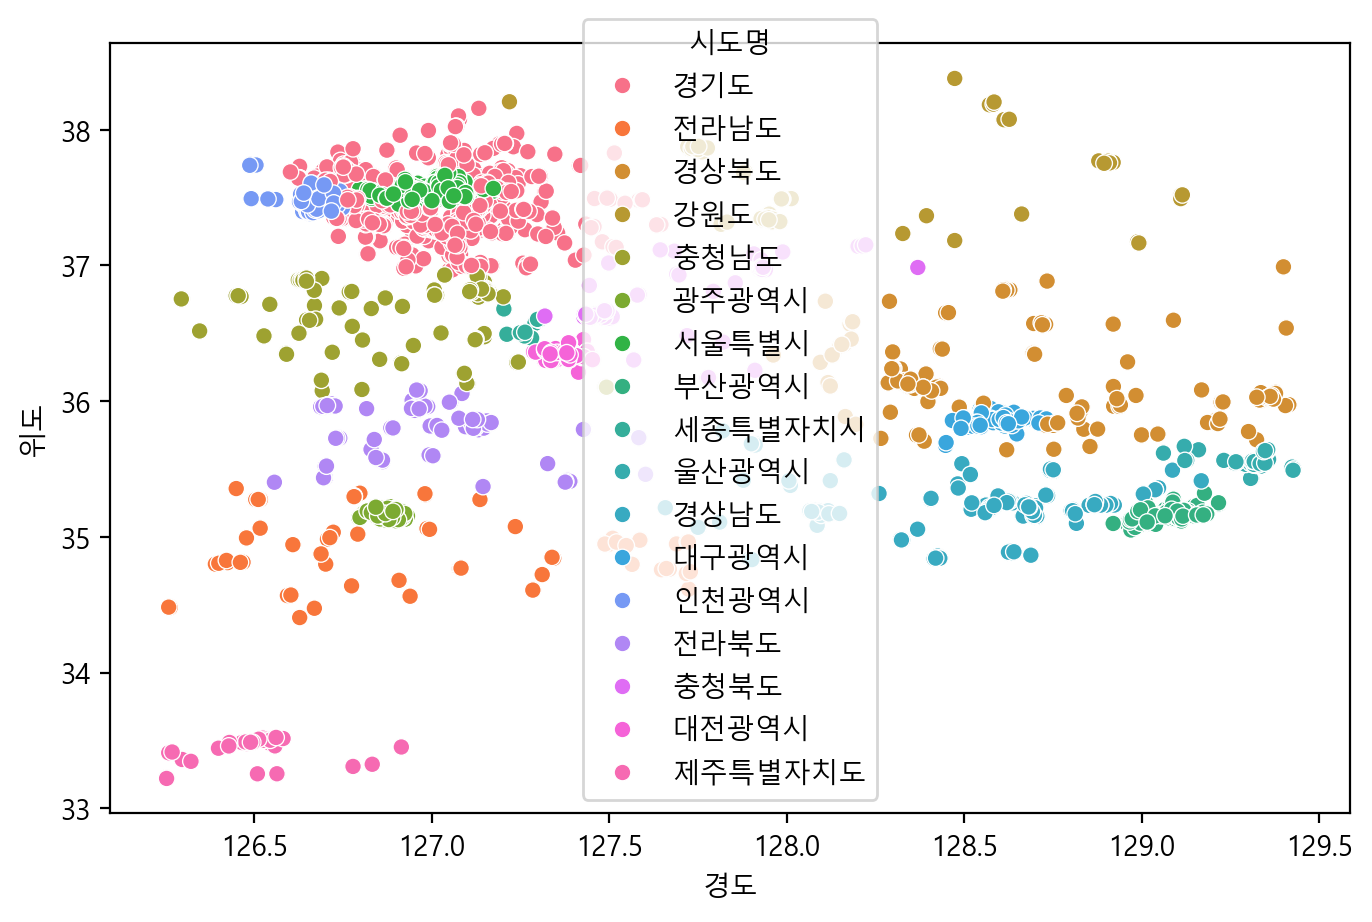

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_animal_hospital, x="경도", y="위도", hue="시도명")

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [8]:
# 데이터 확인
df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [9]:
# 서울 지역 피부과/성형외과 수
df_seoul = df[(df["시도명"] == "서울특별시") & (df["상권업종중분류명"] == "병원")].copy()
skin_plastic = df_seoul[df_seoul["상권업종소분류명"].str.contains("피부|성형")]["시군구명"].value_counts()
skin_plastic

시군구명
강남구     603
서초구     200
송파구      48
마포구      40
영등포구     39
강서구      38
광진구      37
강동구      37
중구       31
은평구      31
서대문구     29
성북구      28
동대문구     27
양천구      26
노원구      26
중랑구      21
성동구      17
구로구      17
관악구      17
동작구      14
강북구      12
종로구      11
용산구      10
금천구       9
도봉구       5
Name: count, dtype: int64

In [10]:
# 서울 지역 전체 병원 수
all = df_seoul["시군구명"].value_counts()
all

시군구명
강남구     2550
서초구     1196
송파구      748
동대문구     644
광진구      600
강서구      579
영등포구     516
은평구      506
노원구      503
강동구      494
성북구      470
마포구      456
중구       423
양천구      398
관악구      395
서대문구     379
종로구      343
동작구      342
성동구      339
중랑구      307
구로구      289
도봉구      275
강북구      259
용산구      222
금천구      173
Name: count, dtype: int64

In [11]:
ratio = skin_plastic / all
ratio.sort_values(ascending=False).round(2)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [12]:
import folium

In [13]:
df_hospital_senior = df[df["상권업종소분류명"] == "노인/치매병원"]
df_hospital_senior.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [14]:
map = folium.Map(location=[df_hospital_senior["위도"].mean(), df_hospital_senior["경도"].mean()], zoom_start=8)

for n in df_hospital_senior.index:
    name = df_hospital_senior.loc[n, "상호명"]
    address = df_hospital_senior.loc[n, "도로명주소"]
    city = df_hospital_senior.loc[n, "시도명"]
    location = [df_hospital_senior.loc[n, "위도"], df_hospital_senior.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = folium.Popup(f"<b>{name}</b><br>{address}", min_width=200, max_width=200),
        tooltip = city,
        icon= folium.Icon(icon='circle-h', prefix="fa")
    ).add_to(map)
map